In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime
import tensorflow as tf

In [8]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
company_list= [AAPL, GOOG, MSFT, AMZN]

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-11-19  19.311071  20.267857  19.281429  20.204643  17.375750  823317600
2012-11-20  20.425358  20.426786  19.806429  20.032499  17.227699  642754000
2012-11-21  20.151787  20.263214  19.878571  20.060715  17.251972  373002000
2012-11-23  20.256071  20.428572  20.092857  20.410713  17.552967  272826400
2012-11-26  20.567858  21.071428  20.489643  21.054644  18.106735  630579600


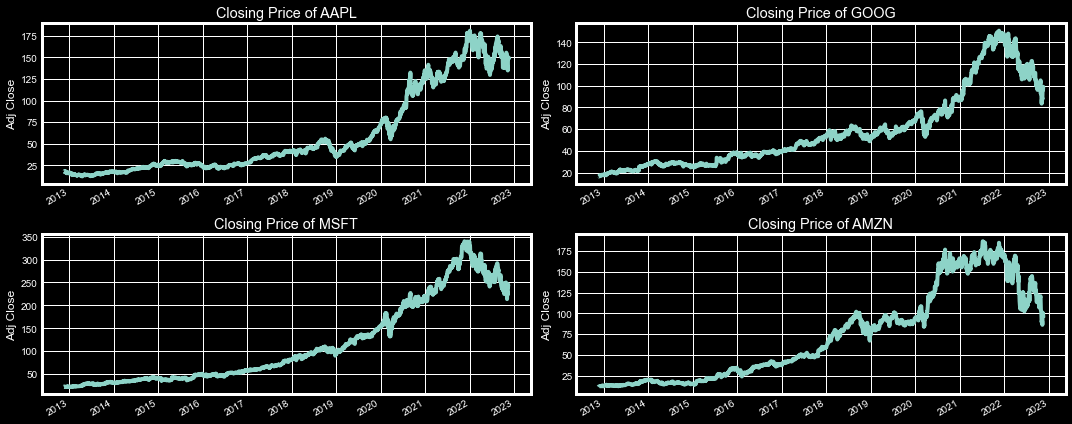

In [32]:

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

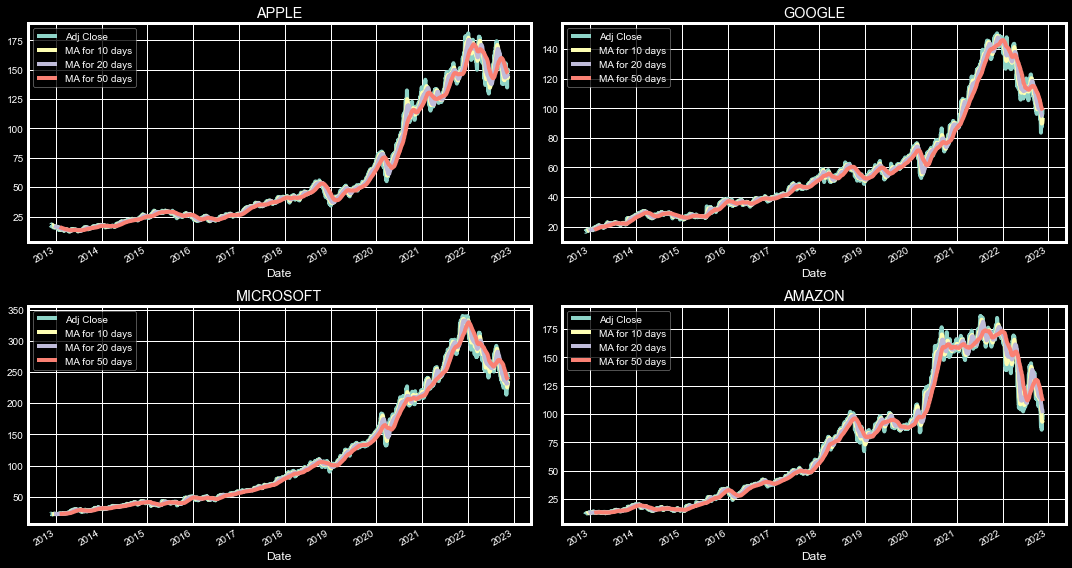

In [33]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

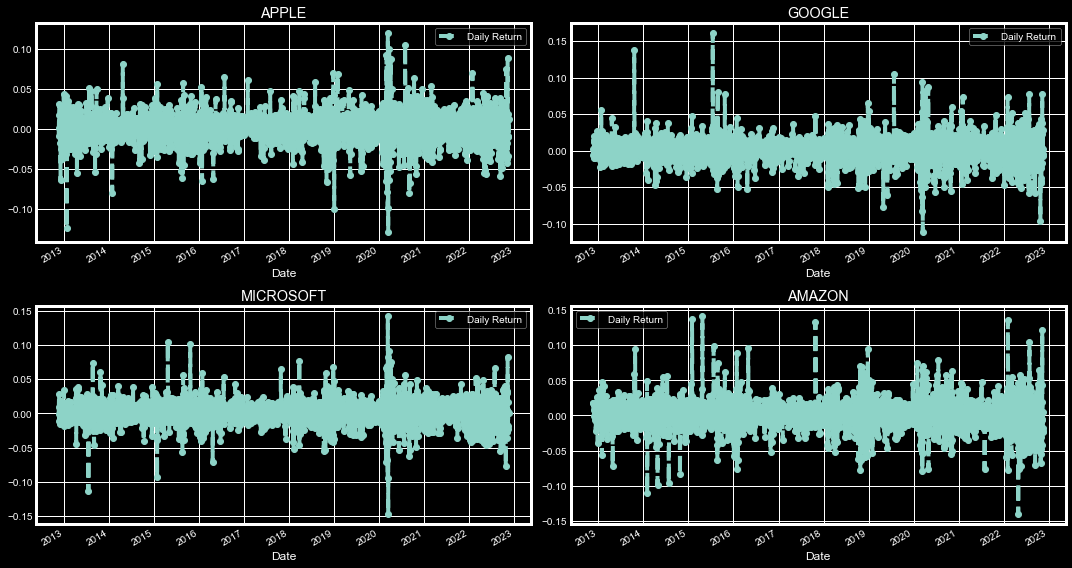

In [148]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

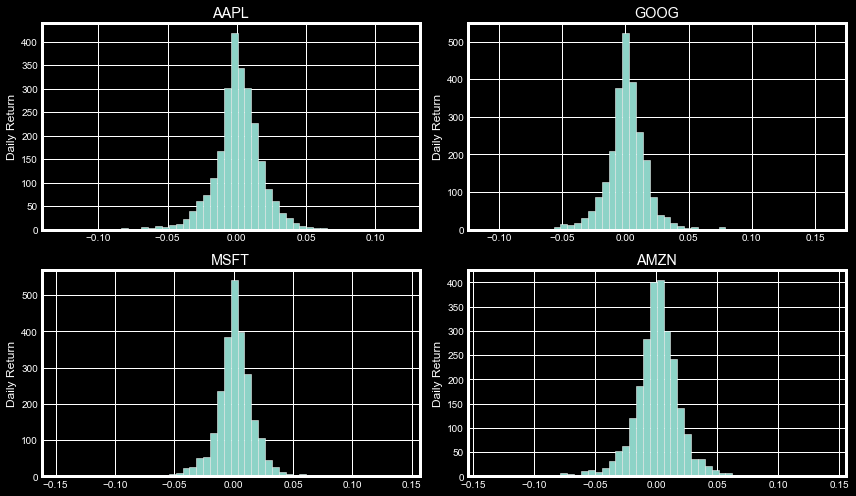

In [150]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{tech_list[i - 1]}')
    
plt.tight_layout()

In [60]:
data = MSFT.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .90 ))
training_data_len

2267

In [61]:
dataset

array([[ 20.20464325],
       [ 20.03249931],
       [ 20.06071472],
       ...,
       [150.03999329],
       [148.78999329],
       [150.72000122]])

In [48]:
from sklearn.preprocessing import MinMaxScaler
min_max= MinMaxScaler()
scaled_price= min_max.fit_transform(dataset)

In [68]:
train_data = scaled_price[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.03723105, 0.03620676, 0.03637465, 0.0384572 , 0.04228869,
       0.04127929, 0.04088828, 0.04225256, 0.04138554, 0.04157891,
       0.0393816 , 0.03150614, 0.03330182, 0.03032886, 0.02959996,
       0.03205865, 0.03155076, 0.02957233, 0.02534346, 0.02726451,
       0.03046699, 0.02885406, 0.02788079, 0.02737077, 0.02754927,
       0.0260256 , 0.02646337, 0.02530096, 0.03009934, 0.03368219,
       0.03220953, 0.02900069, 0.02834192, 0.02864155, 0.02689688,
       0.02825905, 0.02757691, 0.02363492, 0.02027095, 0.02455719,
       0.02383254, 0.02326303, 0.02427668, 0.02624024, 0.01274399,
       0.01048717, 0.0126016 , 0.01439515, 0.01408915, 0.01380439,
       0.013407  , 0.01100568, 0.01430378, 0.01419965, 0.01650959,
       0.01794613, 0.01899803, 0.01644159, 0.01625246, 0.01616321])]
[0.014796792701166545]

[array([0.03723105, 0.03620676, 0.03637465, 0.0384572 , 0.04228869,
       0.04127929, 0.04088828, 0.04225256, 0.04138554, 0.04157891,
       0.0393816 , 0.03150614, 0.0

In [69]:
x_train.shape

(2207, 60, 1)

In [167]:
from timeit import default_timer as timer
import keras
class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(float("{:.2f}".format(timer()-self.starttime)))

cb = TimingCallback()

In [164]:
from livelossplot import PlotLossesKeras

In [161]:
class Histories(keras.callbacks.Callback):

    def on_train_begin(self,logs={}):
        self.losses = []
        self.accuracies = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracies.append(logs.get('acc'))
histories = Histories()

In [169]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math


batch_sizes= [1, 8,  16, 32, 64, 256,
              512, x_train.shape[0]]

print(batch_sizes)

test_data = scaled_price[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

rmse_values= []
pred_values= []
losses= []
for batch in batch_sizes:
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size= batch, epochs=3, callbacks= [cb])
    predictions = model.predict(x_test)
    predictions = min_max.inverse_transform(predictions)
    pred_values.append(predictions)
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    rmse_values.append(rmse)

[1, 8, 16, 32, 64, 256, 512, 2207]
Epoch 1/3
2207/2207 [==============================] - 44s 19ms/step - loss: 8.7749e-04
Epoch 2/3
2207/2207 [==============================] - 43s 20ms/step - loss: 5.0771e-04
Epoch 3/3
8/8 [==============================] - 1s 32ms/step
Epoch 1/3
276/276 [==============================] - 18s 55ms/step - loss: 0.0014
Epoch 2/3
276/276 [==============================] - 15s 55ms/step - loss: 3.4516e-04
Epoch 3/3
8/8 [==============================] - 1s 33ms/step
Epoch 1/3
138/138 [==============================] - 13s 77ms/step - loss: 0.0016
Epoch 2/3
138/138 [==============================] - 11s 78ms/step - loss: 3.2661e-04
Epoch 3/3
8/8 [==============================] - 1s 34ms/step
Epoch 1/3
69/69 [==============================] - 11s 121ms/step - loss: 0.0041
Epoch 2/3
69/69 [==============================] - 8s 123ms/step - loss: 2.2383e-04
Epoch 3/3
8/8 [==============================] - 1s 33ms/step
Epoch 1/3
35/35 [=======================

In [153]:
sum1= 0
time= []
for k in range(len(cb.logs)):
    sum1+= cb.logs[k]
    if((k+1)%3== 0):
        time.append(sum1)
        sum1= 0

In [154]:
time

[142.86, 45.82, 32.08, 21.86, 20.41, 12.899999999999999, 11.81, 7.65]

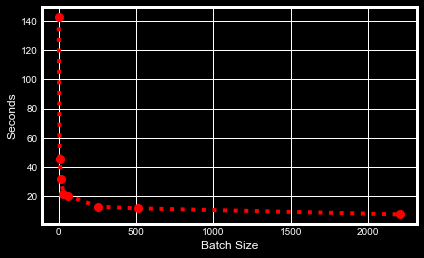

In [155]:
plt.plot(batch_sizes, time, 'r-o', markersize= 8, linestyle= 'dotted')
plt.xlabel('Batch Size')
plt.ylabel('Seconds')
plt.show();

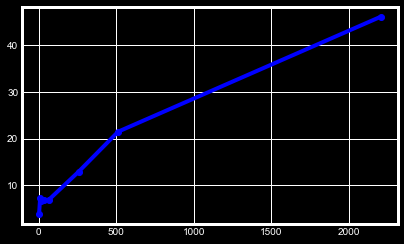

In [156]:
plt.plot(batch_sizes, rmse_values, 'b-o')
plt.show();

In [122]:
valid.index[-1]

Timestamp('2022-11-17 00:00:00')

<ipython-input-157-0f11357999e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['PredictionsSGD'] = pred_values[0]
<ipython-input-157-0f11357999e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['PredictionsBB']= pred_values[-1]


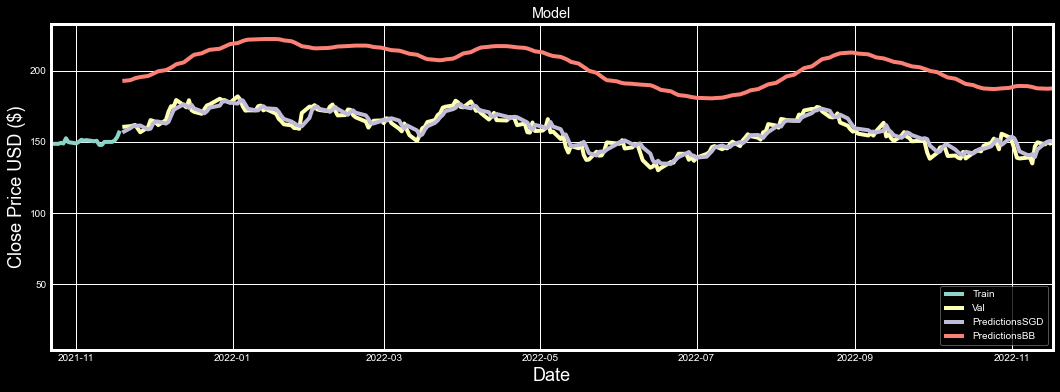

In [157]:

train = data[:training_data_len]
valid = data[training_data_len:]
valid['PredictionsSGD'] = pred_values[0]
valid['PredictionsBB']= pred_values[-1]
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'PredictionsSGD', 'PredictionsBB']])
plt.legend(['Train', 'Val', 'PredictionsSGD', 'PredictionsBB'], loc='lower right')
plt.xlim(train.index[-20], valid.index[-1])
plt.show()